In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Importing models 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [14]:
data = pd.read_csv("C:/Users/20s19984/Downloads/fofo/heart.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No handles with labels found to put in legend.


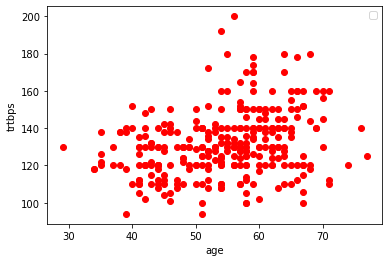

In [15]:
#Analyzing data
plt.scatter(data.age, data.trtbps,color = "red") 
plt.xlabel("age")
plt.ylabel("trtbps")
plt.legend()
plt.show()

In [16]:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [17]:
y = data.sex.values
x_data = data.drop(["sex"],axis=1)

In [18]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train,y_train)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

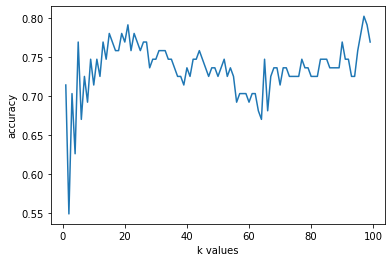

In [21]:
score_list = []
for each in range(1,100):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,100),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [22]:
print("LogisticRegression Accuracy: {}".format(lr.score(x_test,y_test)))
print("KNeighborsClassifier Accuracy: {}".format(knn.score(x_test,y_test)))
print("DecisionTreeClassifier Accuracy: {}".format(dt.score(x_test,y_test)))
print("RandomForestClassifier Accuracy: {}".format(rf.score(x_test,y_test)))
print("Support Vector Machine Accuracy: {}".format(svm.score(x_test,y_test)))

LogisticRegression Accuracy: 0.7362637362637363
KNeighborsClassifier Accuracy: 0.7252747252747253
DecisionTreeClassifier Accuracy: 0.6373626373626373
RandomForestClassifier Accuracy: 0.7472527472527473
Support Vector Machine Accuracy: 0.8131868131868132
